# Case study - Google Data Analytics Professional Certificate




### How does a bike-share navigate speedy success?

This case study serves as the capstone project for earning the Google Data Analytics Professional Certificate, offered by Google through the Coursera platform.

#### Scenario
You are a junior data analyst on the marketing team at Cyclistic, a bike-share company based in Chicago. The director of marketing believes that the company’s future success hinges on increasing the number of annual memberships. To achieve this, your team aims to understand the differences in how casual riders and annual members use Cyclistic bikes. These insights will be crucial in designing a new marketing strategy aimed at converting casual riders into annual members. However, before proceeding, Cyclistic executives need to approve your recommendations, which must be supported by compelling data insights and professional data visualizations.

#### Key Question
How do annual members and casual riders use Cyclistic bikes differently?

The data is in a cloud, from where I downloaded the previous 12 months of Cyclistic’s trip records (from July 2024 to July 2023). Then the data was stored in my local computer

The data is organized by month, so it is distributed in 13 folders in a format .zip. After extracting all the 13 files in format .csv to a single folder in my local computer, I proceeded to merge all the data in a single file to make the analysis easier. For that, I preferred to use a script written in Pandas (Python).

Now that I have a single file, I am able to assess the credibility of the data, how it's organized, and see the description of the dataframe.


In [2]:
import pandas as pd

In [3]:
#read the file using pandas and assign it into a variable
data = pd.read_csv("cyclistic_merged.csv", sep=",")
data.sample()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2420591,E67B9331CD5479DA,classic_bike,2023-10-22 10:04:05,2023-10-22 10:38:21,Clark St & Montrose Ave,KA1503000022,Rush St & Cedar St,KA1504000133,41.961588,-87.666036,41.902309,-87.627691,casual


In [4]:
#Get the shape of the dataframe
data.shape

(6483343, 13)

After merging all the 13 tables into one single file, I dispose now of a csv file with more than *6 millions rows (6.483.343) with 13 collumns.*

Let's have a look at the columns and what it contains

In [5]:
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3070854,B9920CAEDE41486B,classic_bike,2023-11-08 08:13:49,2023-11-08 10:40:30,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Irving Park Rd,13063,41.957867,-87.649505,41.954245,-87.654406,casual
3426378,E388E51B91E34765,electric_bike,2024-01-03 07:57:08,2024-01-03 08:09:32,Damen Ave & Pierce Ave,TA1305000041,NaN,NaN,41.909366,-87.677718,41.890000,-87.660000,member
3309999,FDCC909C999FCC8A,electric_bike,2023-12-05 08:43:49,2023-12-05 09:03:02,Damen Ave & Clybourn Ave,13271,Canal St & Madison St,13341,41.931904,-87.677783,41.882409,-87.639767,member
5566807,7AD93F674443D00B,classic_bike,2024-06-22 15:44:16.362,2024-06-22 16:44:07.664,Montrose Harbor,TA1308000012,LaSalle St & Illinois St,13430,41.963982,-87.638181,41.890762,-87.631697,casual
5687033,7254DE5CED85772A,electric_bike,2024-06-20 06:40:45.508,2024-06-20 06:58:35.458,NaN,NaN,NaN,NaN,41.930000,-87.650000,41.880000,-87.640000,member


### **Data's integrity**

Before cleaning the data, we must assess the consistency/integrity of the data. To do so, we will check for:
1. Missing Values
2. Check for Duplicates
3. Validate Data Types 
4. Assess Data Consistency
5. Validate Referential Integrity
6. Examine Statistical Summaries
7. Check for Data Anomalies or Outliers


In [6]:
#1 Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1069968
start_station_id      1069968
end_station_name      1119780
end_station_id        1119780
start_lat                   0
start_lng                   0
end_lat                  9010
end_lng                  9010
member_casual               0
dtype: int64


We can see that **"start_station_name", "start_station_id", "end_station_name", "end_station_id", "end_lat", and "end_lng"** have a lot of missing values. However, they are not important to answer the business task so they will this columns will be dropped during the cleaning. 

In [7]:
#2 Checking for duplicates

duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


There is no duplicates in the dataframe. 

In [8]:
#3. Validate Data Types 
data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [9]:
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
328857,9C6D25E4A00D4BCD,classic_bike,2023-07-17 18:14:22,2023-07-17 18:21:44,Clark St & Armitage Ave,13146,Sheffield Ave & Webster Ave,TA1309000033,41.918306,-87.636282,41.921540,-87.653818,member
3680634,844969F11BA41499,electric_bike,2024-02-24 11:33:49,2024-02-24 11:45:53,Winchester Ave & Elston Ave,KA1504000140,NaN,NaN,41.924086,-87.676556,41.910000,-87.650000,casual
4497297,8661AF61E9F2BBFA,classic_bike,2024-05-17 09:46:53,2024-05-17 09:52:57,Kimbark Ave & 53rd St,TA1309000037,University Ave & 57th St,KA1503000071,41.799272,-87.595008,41.791478,-87.599861,member
6084608,CC5B69C9982C7F14,classic_bike,2024-07-14 20:12:21.237,2024-07-14 20:17:49.780,Campbell Ave & Montrose Ave,15623,Rockwell St & Eastwood Ave,KA1504000093,41.961524,-87.691177,41.965900,-87.693638,member
6409724,9D81642D9E3D4E09,classic_bike,2024-07-22 09:02:06.481,2024-07-22 09:11:11.698,Campbell Ave & Montrose Ave,15623,Paulina St & Montrose Ave,TA1309000021,41.961524,-87.691177,41.961507,-87.671387,member


We can see that some columns have not the right type of data. "Ride_id", "rideable_type", "start_station_name", "start_station_id", "end_station_name", "end_station_id", and "member_casual" should all be of **string** type. Also, "started_at" and "ended_at" should be **datetime** type. Let's convert them. 

In [10]:
#assign the columns to a variable 
cols_obj_to_str = ['ride_id','rideable_type','start_station_name','start_station_id','end_station_name','end_station_id','member_casual']

#convert the variable from object to string using a for loop
for col in cols_obj_to_str:
    data[col] = data[col].astype(pd.StringDtype())

#print the dtypes to see if they are converted
data.dtypes


ride_id                string
rideable_type          string
started_at             object
ended_at               object
start_station_name     string
start_station_id       string
end_station_name       string
end_station_id         string
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          string
dtype: object

In [11]:
#assign the columns to a variable 
cols_obj_to_date = ['started_at','ended_at']

#convert the variable from object to string using a for loop
for col in cols_obj_to_date:
    data[col] = pd.to_datetime(data[col])

#print the dtypes to see if they are converted
data.dtypes

ride_id                       string
rideable_type                 string
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            string
start_station_id              string
end_station_name              string
end_station_id                string
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 string
dtype: object

Now, all columns have the correct data type

Let's pass to check the consistency of data

In [12]:
# 4 Assess Data Consistency
data['ride_id'].str.len()

0          16
1          16
2          16
3          16
4          16
           ..
6483338    16
6483339    16
6483340    16
6483341    16
6483342    16
Name: ride_id, Length: 6483343, dtype: Int64

The majority of entries in "ride_id" columns seems to be 16 characters longer. Now we must see if there is entries with length different from 16 

In [13]:
#Assign the current lenght of 16 in the dataframe
length = data['ride_id'].str.len()
sum(length != 16) 

0

There is no entries with more or less than 16 caracters so it's consistent. 

We are going to skip the **5. Validate Referential Integrity** step since we don't have any relantionship between tables so there's no primary and foreign keys to validate. 

In [14]:
#6. Examine Statistical Summaries
data.describe()

,start_lat,start_lng,end_lat,end_lng
count,6.483343e+06,6.483343e+06,6.474333e+06,6.474333e+06
mean,4.190304e+01,-8.764656e+01,4.190343e+01,-8.764680e+01
std,4.488528e-02,2.730491e-02,5.123858e-02,4.929987e-02
min,4.163000e+01,-8.794000e+01,0.000000e+00,-1.440500e+02
25%,4.188103e+01,-8.766000e+01,4.188103e+01,-8.766000e+01
50%,4.189897e+01,-8.764319e+01,4.189993e+01,-8.764335e+01
75%,4.193000e+01,-8.762956e+01,4.193000e+01,-8.762963e+01
max,4.207000e+01,-8.746000e+01,8.796000e+01,0.000000e+00


We can see that the summary stats has no sense since it uses only the data that we are going to drop in the cleaning phase. 

Let's pass to the last step.

<AxesSubplot:>

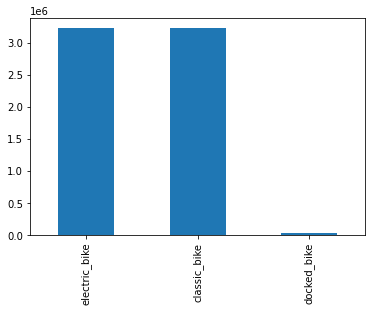

In [15]:
#Check for Data Anomalies or Outliers

#starting with types of bikes
bikes = data['rideable_type'].value_counts()
bikes.plot(kind='bar')

In [16]:
#Let's check more about the docked_bike types
docked = data['rideable_type'] == 'docked_bike'
print(docked.value_counts())

False    6448962
True       34381
Name: rideable_type, dtype: Int64


<AxesSubplot:>

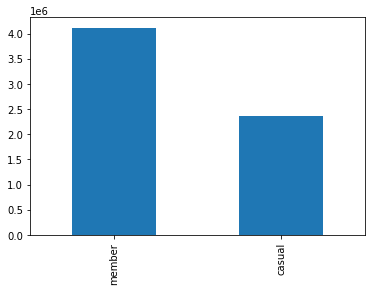

In [17]:
#now with members type 
members_types = data['member_casual'].value_counts()
members_types.plot(kind='bar')

Since there is not so many outliers, we can conclude that the data integrity is assured and we can move to the cleaning phase of the analysis

### **Cleaning the data**

Since we don't have duplicates in the data frame, there is no need to drop any rows for a start. But we must drop the columns that we will not use to answer the business task. The columns that we must drop are **"start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", and "end_lng"**. 

In [18]:
#assigning the columns to drop to a variable
columns_to_drop = ["start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng"]

#droping the columns 
data = data.drop(columns=columns_to_drop)

#getting a sample
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual
5694691,C84227200BA7AC1F,electric_bike,2024-06-30 00:33:48.241,2024-06-30 00:34:08.774,member
3862691,3571EA6F4E1A1AEF,electric_bike,2024-03-28 11:53:25.000,2024-03-28 12:00:46.000,member
1526636,A49BE4C0996D2846,electric_bike,2023-08-19 01:28:46.000,2023-08-19 01:31:39.000,member
889576,01C24ACAB17DDAE2,classic_bike,2023-08-20 11:00:19.000,2023-08-20 11:17:12.000,member
4328171,DA0BF5F255C12C02,classic_bike,2024-04-28 12:57:19.000,2024-04-28 13:05:07.000,casual


Great! We have dropped the columns that are not useful for the analysis. We could of course drop also the "ride_id" column, but it would have blocked the marketing team to identify which user biked using the Cyclistic system. 

Now, let's create a new column 'ride_length' by subtracting the column 'started_at' from the 'column ended_at'

In [28]:
#create new columns 'ride_length' 
data['ride_length'] = data['ended_at'] - data['started_at']


#print a sample
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,ride_length_minutes
5563392,40D6C2845E1E4199,classic_bike,2024-06-05 23:24:40.138,2024-06-05 23:36:39.743,member,0 days 00:11:59.605000,-11.993417
4814026,2AB64F1B164EF125,electric_bike,2024-05-22 14:22:26.000,2024-05-22 14:22:48.000,member,0 days 00:00:22,-0.366667
1778784,6040F9DA3389667B,classic_bike,2023-09-02 23:33:40.000,2023-09-03 00:22:17.000,casual,0 days 00:48:37,-48.616667
5602097,9F65820385A65ACA,electric_bike,2024-06-15 15:00:24.789,2024-06-15 15:59:29.527,casual,0 days 00:59:04.738000,-59.078967
6016806,9582F01ED09835FF,electric_bike,2024-07-01 14:54:53.413,2024-07-01 15:24:03.700,member,0 days 00:29:10.287000,-29.171450


In [32]:
data['ride_length_hours'] = (data['ride_length'].dt.total_seconds() / 3600).round(2)
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,ride_length_minutes,ride_length_hours
3282738,34D45D7ECE2A038D,classic_bike,2023-12-07 11:35:54,2023-12-07 11:38:18,member,0 days 00:02:24,2.400000,0.04
180268,7FB4A14BD6D6F348,classic_bike,2023-07-01 16:44:21,2023-07-01 22:22:54,casual,0 days 05:38:33,338.550000,5.64
2741749,BB56A7317B167112,electric_bike,2023-10-23 19:26:05,2023-10-23 19:34:08,casual,0 days 00:08:03,8.050000,0.13
4791749,7F69B910E0E91EB7,classic_bike,2024-05-19 13:34:27,2024-05-19 15:38:03,casual,0 days 02:03:36,123.600000,2.06
66114,517C3247BF5A82FF,electric_bike,2023-07-13 18:40:33,2023-07-13 18:49:08,casual,0 days 00:08:35,8.583333,0.14


In [34]:
# Function to format Timedelta as HH:MM:SS
def format_timedelta(td):
    total_seconds = td.total_seconds()
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

# Apply the function to the 'ride_length' column
data['ride_length_formatted'] = data['ride_length'].apply(format_timedelta)

#print a sample
data.sample(5)


,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,ride_length_minutes,ride_length_hours,ride_length_formatted
3256855,017FFACCED6F287C,electric_bike,2023-12-05 16:45:02,2023-12-05 16:49:23,member,0 days 00:04:21,4.350000,0.07,00:04:21
1380391,16D928FC00B5F258,classic_bike,2023-08-19 09:25:30,2023-08-19 09:34:38,casual,0 days 00:09:08,9.133333,0.15,00:09:08
775260,724CF9DA6084C7D2,classic_bike,2023-08-08 20:47:25,2023-08-08 20:57:32,member,0 days 00:10:07,10.116667,0.17,00:10:07
1183383,8F1906EDFA237379,electric_bike,2023-08-22 17:29:03,2023-08-22 17:37:22,casual,0 days 00:08:19,8.316667,0.14,00:08:19
714873,66CEC167B4581B3C,electric_bike,2023-07-16 23:28:07,2023-07-16 23:29:36,member,0 days 00:01:29,1.483333,0.02,00:01:29


Great! Now we can drop the "ride_length", "ride_length_minutes", and "ride_length_hours" since we discovered a better way to visualize the ride_length

In [37]:
#drop columns "ride_length", "ride_length_minutes", and "ride_length_hours" by assignt the columns to a variable 

cols_len_to_drop = ["ride_length","ride_length_minutes","ride_length_hours"]

#droping the columns 
data = data.drop(columns=cols_len_to_drop)

#print a sample
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length_formatted
710242,7D02935B69429BC7,electric_bike,2023-07-31 17:48:30,2023-07-31 17:59:28,member,00:10:58
4448263,7261AE6815357E5A,electric_bike,2024-05-01 15:43:04,2024-05-01 16:07:57,member,00:24:53
1891938,05F1182F40989064,classic_bike,2023-09-04 13:16:00,2023-09-04 13:18:54,member,00:02:54
2044448,BB1B96D3C1EC9AB5,electric_bike,2023-09-02 18:16:23,2023-09-02 18:38:11,member,00:21:48
932772,2599EDEA181283A2,classic_bike,2023-08-23 07:08:16,2023-08-23 07:23:34,member,00:15:18


Great! Now, we can create 2 new columns for "Year" and "Month"

In [38]:
#Creating a column for year 
data['Year'] = pd.DatetimeIndex(data['started_at']).year

#print a sample(5)
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length_formatted,Year
5354807,2D9C9CCD649FB857,classic_bike,2024-06-13 21:24:04.871,2024-06-13 22:09:19.914,casual,00:45:15,2024
1544687,7981A7FBDDAACF1C,electric_bike,2023-09-18 15:32:57.000,2023-09-18 15:39:43.000,member,00:06:46,2023
4588916,DFECC2A9F69AC2A5,classic_bike,2024-05-07 23:01:49.000,2024-05-07 23:04:44.000,member,00:02:55,2024
1575181,C8A741088A6F3929,electric_bike,2023-09-30 18:41:15.000,2023-09-30 18:44:47.000,casual,00:03:32,2023
4498323,839B1479004D8A97,electric_bike,2024-05-04 16:37:37.000,2024-05-04 16:43:50.000,casual,00:06:13,2024


In [39]:
#Creating a column for month 
data['Month'] = pd.DatetimeIndex(data['started_at']).month

#print a sample(5)
data.sample(5)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length_formatted,Year,Month
2310256,9033AC83849ABF7B,classic_bike,2023-10-06 08:48:57.000,2023-10-06 08:53:09.000,member,00:04:12,2023,10
278988,971AAD2EA25CAA9A,electric_bike,2023-07-17 12:11:36.000,2023-07-17 12:14:02.000,casual,00:02:26,2023,7
5301431,2B8F2B0DE02C37F4,classic_bike,2024-06-05 17:16:24.624,2024-06-05 17:20:03.668,member,00:03:39,2024,6
230420,536BC321ED78885B,classic_bike,2023-07-05 08:47:34.000,2023-07-05 09:06:43.000,member,00:19:09,2023,7
219955,E8D32C491694D51A,electric_bike,2023-07-10 08:30:37.000,2023-07-10 08:41:28.000,casual,00:10:51,2023,7


It seems we have a good data frame to initiate our analysis! Let's save it into a new .csv file!

In [49]:
 #save it into a pdf
data.to_csv('results_clean.csv', encoding='utf8')

### Analysing phase 

After cleaning the data and saving the clean results into a new .csv file, we can import it and assign it to a variable to start out analysis using **numpy**



In [1]:
#import the cleaned data assigned into a variable 
import pandas as pd
import numpy as np
dataClean = pd.read_csv("results_clean.csv", sep=",")
dataClean.sample(5)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length_formatted,Year,Month
448938,448938,995A2F98EC246E44,classic_bike,2023-07-18 07:30:45,2023-07-18 07:36:39,member,00:05:54,2023,7
2266385,2266385,493338265840B30E,classic_bike,2023-10-23 11:52:27,2023-10-23 12:01:17,casual,00:08:50,2023,10
5205478,5205478,7D09E6447AE6D3B6,electric_bike,2024-06-07 23:27:52.126,2024-06-07 23:42:06.395,member,00:14:14,2024,6
4321895,4321895,579732859E8D41DD,electric_bike,2024-04-13 16:59:05,2024-04-13 17:09:00,member,00:09:55,2024,4
6192692,6192692,3BFB6A94F4D46F72,classic_bike,2024-07-12 16:24:09.319,2024-07-12 16:27:50.006,member,00:03:40,2024,7


In [2]:
#checking the data types 
dataClean.dtypes

Unnamed: 0                int64
ride_id                  object
rideable_type            object
started_at               object
ended_at                 object
member_casual            object
ride_length_formatted    object
Year                      int64
Month                     int64
dtype: object

In [3]:
#convert the 'ride_id', 'rideable_type', 'member_casual' columns from object to string
cols2_obj_to_str = ['ride_id', 'rideable_type', 'member_casual'] #assign the columns to a variable 
for col in cols2_obj_to_str: #using a loop to convert
    dataClean[col] = dataClean[col].astype(pd.StringDtype())

#convert the 'started_at', 'ended_at', columns from object to datetime
cols2_obj_to_date = ['started_at','ended_at'] #assign the columns to a variable 
for col in cols2_obj_to_date: #using a loop to convert
    dataClean[col] = pd.to_datetime(dataClean[col])

# Convert the time strings to timedelta
ride_length = dataClean['ride_length_formatted'] #assign the columns to a variable 
ride_length = pd.to_timedelta(ride_length)


#print the dtypes to see if they are converted
dataClean.dtypes


Unnamed: 0                        int64
ride_id                          string
rideable_type                    string
started_at               datetime64[ns]
ended_at                 datetime64[ns]
member_casual                    string
ride_length_formatted            object
Year                              int64
Month                             int64
dtype: object

We are going to explore the data, group it and apply aggregation functions like sum(), mean(), count(), min(), max()

In [15]:
#Checking how many annual members and casual riders we have
dataClean['member_casual'].value_counts()

member    4113411
casual    2369932
Name: member_casual, dtype: int64

So, the majority of the users in the previous 12 months was composed my annual members (4.113.411). We have only 2.369.932 casual riders. Let's check what this represents in percentage

In [14]:
#Checking the percentage of members and casual riders by dividing the data and multiplying by 100
(dataClean['member_casual'].value_counts()/6483343)*100

member    63.445833
casual    36.554167
Name: member_casual, dtype: float64

The annual members represent **63,5%** of all the rides in the previous 12 months and the casual riders only **35,5%**.

Let's to the same thing for the type of bike

In [19]:
#Checking the distribution of types of bikes used in the previous 12 months
dataClean['rideable_type'].value_counts()


electric_bike    3224572
classic_bike     3224390
docked_bike        34381
Name: rideable_type, dtype: int64

In [18]:
#Checking the percentage of bike types by dividing the data and multiplying by 100
(dataClean['rideable_type'].value_counts()/6483343)*100

electric_bike    49.736255
classic_bike     49.733448
docked_bike       0.530297
Name: rideable_type, dtype: float64

In the previous 12 months, both eletric and classic bikes were equally used by all users, almost 50/50 in the general preference. However, we must see if members and casual riders have a specific preference for the type of bike. 

In [8]:
# Grouping the data
members_types = dataClean.groupby(['member_casual', 'rideable_type']).size().reset_index(name='count')

# Calculate the total counts per user type
total_counts = dataClean.groupby('rideable_type').size().reset_index(name='total_count')

# Merge the total counts with the grouped data
merged = pd.merge(members_types, total_counts, on='rideable_type')

# Calculate the proportion
merged['proportion'] = merged['count'] / merged['total_count']

print(merged)



  member_casual  rideable_type    count  total_count  proportion
0        casual   classic_bike  1124432      3224390    0.348727
1        member   classic_bike  2099958      3224390    0.651273
2        casual    docked_bike    34381        34381    1.000000
3        casual  electric_bike  1211119      3224572    0.375591
4        member  electric_bike  2013453      3224572    0.624409


So, there is not a preference between the type of bike, it's almost the same. However, let's see if what type of member tends to bike longer than other. Before that, let's calculate the max, the min, and the average of the 'ride_length'

In [5]:
# Assign the column 'ride_length_formatted' to a variable
ride_length = dataClean['ride_length_formatted']

# Convert the time strings to timedelta
ride_length = pd.to_timedelta(ride_length)

# Convert timedelta to total seconds
ride_length_seconds = ride_length.dt.total_seconds()

# Determine the max, min, and mean in seconds
max_value = ride_length_seconds.max()
min_value = ride_length_seconds.min()
mean_value = ride_length_seconds.mean()

# Convert seconds back to HH:MM:SS format if desired
max_time = pd.to_timedelta(max_value, unit='s')
min_time = pd.to_timedelta(min_value, unit='s')
mean_time = pd.to_timedelta(mean_value, unit='s')

print(f'Max ride length is {max_time}')
print(f'Min ride length is {min_time}')
print(f'Mean ride length is {mean_time}')


Max ride length is 68 days 09:29:04
Min ride length is -12 days +09:15:13
Mean ride length is 0 days 00:18:27.836697519


We can clearly see that with this format 'deltatime' it's not possible to calculate the max, min, and mean ride_lengths. Let's try to create another column to the dataframe 

In [6]:
# Calculate ride_length in minutes
dataClean['ride_length'] = (dataClean['ended_at'] - dataClean['started_at']).dt.total_seconds() / 60

# Extract the hours and minutes
dataClean['ride_length'] = dataClean['ride_length'].apply(lambda x: f"{int(x // 60)}h {int(x % 60)}m")

# Display the DataFrame with the new column
dataClean.sample(5)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length_formatted,Year,Month,ride_length
4821673,4821673,E68140BC526728BA,electric_bike,2024-05-12 16:00:20.000,2024-05-12 16:31:26.000,casual,00:31:06,2024,5,0h 31m
174857,174857,EFFE7A612F1C4A52,electric_bike,2023-07-22 19:35:50.000,2023-07-22 19:37:37.000,casual,00:01:47,2023,7,0h 1m
2668694,2668694,F14B159533DA42A8,electric_bike,2023-10-12 17:59:08.000,2023-10-12 18:06:28.000,member,00:07:20,2023,10,0h 7m
2177564,2177564,7A98773ADC5D923D,electric_bike,2023-09-07 17:46:50.000,2023-09-07 17:52:17.000,casual,00:05:27,2023,9,0h 5m
5249974,5249974,0C11D99C409DB280,electric_bike,2024-06-22 12:04:49.474,2024-06-22 12:26:06.055,member,00:21:16,2024,6,0h 21m


Now, let's try to calculate the max, min, and mean of the new colum 'ride_length'

In [7]:
# Calculate max, min, and mean ride_length in minutes
ride_length_minutes = (dataClean['ended_at'] - dataClean['started_at']).dt.total_seconds() / 60
max_ride_length = ride_length_minutes.max()
min_ride_length = ride_length_minutes.min()
mean_ride_length = ride_length_minutes.mean()

print(f"Max ride length: {int(max_ride_length // 60)}h {int(max_ride_length % 60)}m")
print(f"Min ride length: {int(min_ride_length // 60)}h {int(min_ride_length % 60)}m")
print(f"Mean ride length: {int(mean_ride_length // 60)}h {int(mean_ride_length % 60)}m")

Max ride length: 1641h 29m
Min ride length: -278h 23m
Mean ride length: 0h 18m


Ok, now we can spot that tthere are likely some issues with the dataset, such as: Incorrect Timestamps and Data Entry Errors that were not spotted during the Cleaning phase. Before going on, we must correct this by first finding the rows where the ride length is negative than finding outliers. 

In [11]:
# Find rows where the ride length is negative
negative_durations = dataClean[dataClean['ended_at'] < dataClean['started_at']]

print("Negative Durations:")
print(negative_durations)


Negative Durations:
         Unnamed: 0           ride_id  rideable_type          started_at  \
234768       234768  5597B82879097D80  electric_bike 2023-07-13 19:36:16   
251240       251240  09632A75482D0DEE  electric_bike 2023-07-30 01:21:48   
299166       299166  680495115CD6F9D4  electric_bike 2023-07-21 15:57:38   
311998       311998  958E9E446D3FBE60  electric_bike 2023-07-13 19:52:00   
323959       323959  7F26C9FD6FC842C8  electric_bike 2023-07-23 12:39:17   
...             ...               ...            ...                 ...   
5018922     5018922  54EDCF8C15FE17CF  electric_bike 2024-05-31 20:21:03   
5020483     5020483  ED470B3CD09657DF  electric_bike 2024-05-12 15:10:17   
5021644     5021644  AFD530265FD8AF94  electric_bike 2024-05-16 20:06:59   
5022017     5022017  9A4225B190E96360  electric_bike 2024-05-10 15:15:50   
5022916     5022916  A9C1239F1B268657  electric_bike 2024-05-31 12:36:53   

                   ended_at member_casual ride_length_formatted  Ye

We have 434 rows with ride_length negative because the 'ended_at' data was wrongly populated. The best option is to drop this rows containing errors. 

In [26]:
# Calculate ride_length in minutes again for outlier detection
dataClean['ride_length_minutes'] = (dataClean['ended_at'] - dataClean['started_at']).dt.total_seconds() / 60

# Remove negative durations
df_cleaned = dataClean[dataClean['ride_length_minutes'] >= 0] 
len(df_cleaned) #the new length should be 6.482.909


6482909

Ok, now let's check for more outliers in ride_length

In [18]:
# Summary statistics
print("Summary Statistics:")
print(df_cleaned['ride_length_minutes'].describe())

Summary Statistics:
count    6.482909e+06
mean     1.848878e+01
std      1.509346e+02
min      0.000000e+00
25%      5.626683e+00
50%      9.883333e+00
75%      1.756667e+01
max      9.848907e+04
Name: ride_length_minutes, dtype: float64


In [19]:
# Find unusually long rides (for example, longer than 12 hours)
unusually_long_rides = df_cleaned[df_cleaned['ride_length_minutes'] > 12 * 60]

print("Unusually Long Rides:")
print(unusually_long_rides)

# Find unusually short rides (for example, negative or extremely short durations)
unusually_short_rides = df_cleaned[df_cleaned['ride_length_minutes'] < 0]

print("Unusually Short Rides:")
print(unusually_short_rides)

Unusually Long Rides:
         Unnamed: 0           ride_id rideable_type              started_at  \
394             394  047B62633B15D1B6  classic_bike 2023-07-03 20:45:43.000   
2316           2316  F29A4C464DC2E896  classic_bike 2023-07-03 17:51:47.000   
2376           2376  3FE6E76BF813294B   docked_bike 2023-07-07 18:13:06.000   
2523           2523  2BE747FEB1F6EAE0  classic_bike 2023-07-04 19:33:25.000   
2533           2533  AC39C5FD5E02DE34   docked_bike 2023-07-17 20:13:07.000   
...             ...               ...           ...                     ...   
6479178     6479178  3D919A0B0262DCB8  classic_bike 2024-07-23 17:27:05.263   
6479318     6479318  9C1F8AB7611D78CA  classic_bike 2024-07-12 09:38:38.705   
6479904     6479904  FB26B7CE53A6A707  classic_bike 2024-07-15 12:00:20.395   
6480949     6480949  1E8EC6CBE5E484F0  classic_bike 2024-07-23 15:11:27.429   
6481321     6481321  D952167BFC9FF5D3  classic_bike 2024-07-10 15:56:35.914   

                       ended_

There is no unusually short ride, but we have more than 12 thousand unusually long rides. However, it is acceptable that someone stays with the bike for more than 12 hours or even a day for many reasons. For the purpose of this analysis, let's concentrate only at the rides with maximum of 24 hours

In [24]:
# Find unusually long rides (for example, longer than 12 hours)
unusually_long_rides2 = df_cleaned[df_cleaned['ride_length_minutes'] > 24 * 60]

print("Unusually Long Rides:")
print(unusually_long_rides2)


Unusually Long Rides:
         Unnamed: 0           ride_id rideable_type              started_at  \
2533           2533  AC39C5FD5E02DE34   docked_bike 2023-07-17 20:13:07.000   
9331           9331  6BC1CAB1D40E4000  classic_bike 2023-07-29 10:05:39.000   
15142         15142  1F87EA7F0585B13B  classic_bike 2023-07-09 19:27:46.000   
44882         44882  2BDFB5F7FC92EF4F   docked_bike 2023-07-15 17:23:18.000   
186126       186126  A9521ACAE3830A3E  classic_bike 2023-07-27 16:45:18.000   
...             ...               ...           ...                     ...   
6378032     6378032  85BD89C02B9C0FF6  classic_bike 2024-07-20 12:43:58.144   
6420256     6420256  49458ABB5D014ADB  classic_bike 2024-07-17 17:04:50.005   
6455699     6455699  58EB8893E72A3836  classic_bike 2024-07-21 13:17:58.178   
6466359     6466359  E0EF9956FB773C0F  classic_bike 2024-07-20 20:14:08.199   
6479904     6479904  FB26B7CE53A6A707  classic_bike 2024-07-15 12:00:20.395   

                       ended_

In [27]:
# Remove ride lengths with more thatn 24 hours
df_cleaned = df_cleaned[df_cleaned['ride_length_minutes'] < 24 * 60] 
len(df_cleaned) #the new length should be 6.473.844

6473844

Now, let's check if there is ride_length equal to 0

In [34]:
# Find rides equal to 0
rides_zero = df_cleaned[df_cleaned['ride_length_minutes'] == 0]

print("Rides equal to 0")
print(rides_zero)


Rides equal to 0
         Unnamed: 0           ride_id  rideable_type          started_at  \
12803         12803  5C1564EF34FE0C9B  electric_bike 2023-07-31 07:39:56   
16270         16270  9E8EB355F2B879C6  electric_bike 2023-07-20 15:50:58   
21510         21510  92E9649507127D92   classic_bike 2023-07-14 09:29:50   
27557         27557  80769EAE6480B2B0  electric_bike 2023-07-03 23:01:05   
34197         34197  DB118F9DFD6A3311   classic_bike 2023-07-07 11:54:50   
...             ...               ...            ...                 ...   
5020129     5020129  BB40B7787448A6E5  electric_bike 2024-05-22 15:23:08   
5021368     5021368  88C11CAF24E89B47  electric_bike 2024-05-07 13:54:54   
5021676     5021676  D77E6F954ECE8120  electric_bike 2024-05-23 16:02:43   
5021677     5021677  7DF8A1EEED0A2F2A  electric_bike 2024-05-23 16:02:01   
5021807     5021807  09A5FA1C47075484  electric_bike 2024-05-29 11:19:11   

                   ended_at member_casual  Year  Month ride_length  \


In [35]:
# Remove ride lengths equals to 0
df_cleaned = df_cleaned[df_cleaned['ride_length_minutes'] != 0] 
len(df_cleaned) #the new length should be 6.472.545

6472545

Let's check again the df_cleaned dataframe

In [36]:
df_cleaned.sample(5)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,Year,Month,ride_length,ride_length_minutes
1544359,1544359,9AAE5C9D70EC20AE,classic_bike,2023-09-30 12:11:16.000,2023-09-30 12:41:58.000,casual,2023,9,0h 30m,30.700000
4954921,4954921,9A03A4E9618F4B61,classic_bike,2024-05-04 15:47:23.000,2024-05-04 15:55:31.000,member,2024,5,0h 8m,8.133333
3569309,3569309,9AA6F3B264220420,classic_bike,2024-02-27 08:19:23.000,2024-02-27 08:22:21.000,member,2024,2,0h 2m,2.966667
5956440,5956440,3F373E402230EDD5,electric_bike,2024-07-06 14:30:41.189,2024-07-06 14:41:59.809,casual,2024,7,0h 11m,11.310333
2785528,2785528,3E4DEDE9849A74D4,classic_bike,2023-11-19 13:39:06.000,2023-11-19 13:45:49.000,member,2023,11,0h 6m,6.716667


Let's get rid of the 'ride_length_formatted' column and save the dataframe into a new .csv file

In [37]:

#drop the ride_length_formatted column
#df_cleaned = df_cleaned.drop(columns=['ride_length_formatted']) 

 #save it into a pdf
df_cleaned.to_csv('df_cleaned.csv', encoding='utf8')

Now, let's work with the new .csv file and proceed our analysis

In [1]:
#import the df_cleaned data assigned into a variable 
import pandas as pd
import numpy as np
df= pd.read_csv("df_cleaned.csv", sep=",")
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ride_id,rideable_type,started_at,ended_at,member_casual,Year,Month,ride_length,ride_length_minutes,day_of_week
4031,4031,4032,4032,CDC494F74E94FBF0,classic_bike,2023-07-03 17:06:12,2023-07-03 17:59:14,member,2023,7,0h 53m,53.033333,Monday
2647798,2647798,2652081,2652081,C4B1455B961F13FC,classic_bike,2023-10-20 14:17:11,2023-10-20 14:34:07,member,2023,10,0h 16m,16.933333,Friday
3779126,3779126,3785360,3785360,5B2C72E182F541A6,electric_bike,2024-03-18 18:33:41,2024-03-18 18:43:48,member,2024,3,0h 10m,10.116667,Monday
4404218,4404218,4411604,4411604,B1677BBF98CB3E94,electric_bike,2024-04-17 09:46:21,2024-04-17 09:49:39,member,2024,4,0h 3m,3.300000,Wednesday
1241350,1241350,1243010,1243010,609014C4D64730EB,classic_bike,2023-08-31 08:34:24,2023-08-31 08:40:01,member,2023,8,0h 5m,5.616667,Thursday


In [2]:
#Checking the dtypes
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
Unnamed: 0.1.1           int64
ride_id                 object
rideable_type           object
started_at              object
ended_at                object
member_casual           object
Year                     int64
Month                    int64
ride_length             object
ride_length_minutes    float64
day_of_week             object
dtype: object

In [3]:
#convert the 'ride_id', 'rideable_type', 'member_casual' columns from object to string
cols3_obj_to_str = ['ride_id', 'rideable_type', 'member_casual'] #assign the columns to a variable 
for col in cols3_obj_to_str: #using a loop to convert
    df[col] = df[col].astype(pd.StringDtype())

#convert the 'started_at', 'ended_at', columns from object to datetime
cols3_obj_to_date = ['started_at','ended_at'] #assign the columns to a variable 
for col in cols3_obj_to_date: #using a loop to convert
    df[col] = pd.to_datetime(df[col])

# Convert the time strings to timedelta
ride_length = df['ride_length'] #assign the columns to a variable 
ride_length = pd.to_timedelta(ride_length)


#print the dtypes to see if they are converted
df.dtypes


Unnamed: 0                      int64
Unnamed: 0.1                    int64
Unnamed: 0.1.1                  int64
ride_id                        string
rideable_type                  string
started_at             datetime64[ns]
ended_at               datetime64[ns]
member_casual                  string
Year                            int64
Month                           int64
ride_length                    object
ride_length_minutes           float64
day_of_week                    object
dtype: object

Ok, everything looks great. Let's proceed with our min, max, and mean ride length

In [5]:
# Calculate max, min, and mean ride_length in minutes
ride_length_minutes = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
max_ride_length = ride_length_minutes.max()
min_ride_length = ride_length_minutes.min()
mean_ride_length = ride_length_minutes.mean()

print(f"Max ride length: {int(max_ride_length // 60)}h {int(max_ride_length % 60)}m")
print(f"Min ride length: {int(min_ride_length // 60)}h {int(min_ride_length % 60)}m")
print(f"Mean ride length: {int(mean_ride_length // 60)}h {int(mean_ride_length % 60)}m")

Max ride length: 23h 59m
Min ride length: 0h 0m
Mean ride length: 0h 15m


The important thing is that we know now that the total average of rides is **15 minutes**. Let's check if casual member or annual members have different average ride lengths. 

In [4]:
# Group by member_type and calculate the average ride length
avg_ride_per_member = df.groupby('member_casual')['ride_length_minutes'].mean()

# Display the average ride length per member type
print(f"Mean ride length for casual member is: {int(avg_ride_per_member['casual'] // 60)}h {int(avg_ride_per_member['casual'] % 60)}m")
print(f"Mean ride length for annual member is: {int(avg_ride_per_member['member'] // 60)}h {int(avg_ride_per_member['member'] % 60)}m")

Mean ride length for casual member is: 0h 21m
Mean ride length for annual member is: 0h 12m


In [5]:
#Save the 'avg_ride_per_member' into a csv file
avg_ride_per_member.to_csv('avg_ride_per_member.csv', encoding='utf8')

Nos, let's analyse which parts of the year has more and less bike rides and the preference between type of users

In [6]:
#First, count values per year
rides_year = df['Year'].value_counts()

#Then, count values per month 
rides_month = df['Month'].value_counts()

print("Number of rides per year")
print(rides_year)

print("Number of rides per month")
print(rides_month)

Number of rides per year
2023    3324054
2024    3148491
Name: Year, dtype: int64
Number of rides per month
7     1514035
8      770280
6      709553
9      665292
5      608575
10     536342
4      414320
11     362012
3      301166
12     223755
2      222768
1      144447
Name: Month, dtype: int64


2023 had slightly more rides than 2024. The big diference we can see however is that July is the month with the highest number of rides (1.514.035), followed by August and June. It indicates that Cyclistic is mostly used during summer. The months with least rides are during winter. Can we check this by type of user?

In [7]:
# Grouping the data
members_month = df.groupby(['member_casual', 'Month']).size().reset_index(name='count')

# Calculate the total counts per user type
total_month = df.groupby('Month').size().reset_index(name='total_month')

# Merge the total counts with the grouped data
merged_members_month = pd.merge(members_month, total_month, on='Month')

# Calculate the proportion
merged_members_month['proportion'] = (merged_members_month['count'] / merged_members_month['total_month'] * 100).round(2)

# Separate into two DataFrames based on member type
casual_df = merged_members_month[merged_members_month['member_casual'] == 'casual']
member_df = merged_members_month[merged_members_month['member_casual'] == 'member']

# Display the two DataFrames
print("Casual Members DataFrame:")
print(casual_df.sort_values(by='count', ascending=False)) #Sorting by descending order

print("Annual Members DataFrame:")
print(member_df.sort_values(by='count', ascending=False)) #Sorting by descending order

Casual Members DataFrame:
   member_casual  Month   count  total_month  proportion
12        casual      7  649783      1514035       42.92
14        casual      8  310040       770280       40.25
10        casual      6  300153       709553       42.30
16        casual      9  260819       665292       39.20
8         casual      5  230327       608575       37.85
18        casual     10  176540       536342       32.92
6         casual      4  131337       414320       31.70
20        casual     11   98072       362012       27.09
4         casual      3   82200       301166       27.29
22        casual     12   51478       223755       23.01
2         casual      2   46931       222768       21.07
0         casual      1   24320       144447       16.84
Annual Members DataFrame:
   member_casual  Month   count  total_month  proportion
13        member      7  864252      1514035       57.08
15        member      8  460240       770280       59.75
11        member      6  409400     

In [8]:
#Save the 'merged_members_month' into a csv file
merged_members_month.to_csv('rides_per_month_members.csv', encoding='utf8')

We can see that when we separate the type of members by month, that the number of casual riders increase almost by 3 from the peak of the winter to the peak of the summer. Casual riders tends to bike more during hot and sunny days in Chicago. However, the members with annual memberships tends to maintain a regular use troughout the year, with peaks during winter (January, December, and February). 

It could be because member uses the bike to go to work during the week than during the weekend, even when it's winter. Let's try to check it out if this hypothesis is valid. 

In [9]:
#create a new colum 'day_of_week' by extracting this information from 'started_at' column  
df['day_of_week'] = df['started_at'].dt.day_name()
df.sample(5)

#save it into a pdf to update the file with the day of the week column 
#df.to_csv('df_cleaned.csv', encoding='utf8')

Now that we have the 'day_of_week' column, let's see in general and by type of user the day of week with more activity. 

In [10]:
#assign the column into a variable
days_week = df['day_of_week'].value_counts()
print(days_week)

Saturday     1020801
Wednesday     962780
Thursday      934933
Friday        920214
Tuesday       918509
Sunday        864193
Monday        851115
Name: day_of_week, dtype: int64


Saturday is the day with the highest activity, followed by Wednesday, and Thursday. Monday and Sunday are the less preferable, even tough the differences are not extremes in numbers. Let's see now by type of user

In [11]:
# Grouping the data
members_days = df.groupby(['member_casual', 'day_of_week']).size().reset_index(name='count')

# Calculate the total counts per user type
total_days = df.groupby('day_of_week').size().reset_index(name='total_days')

# Merge the total counts with the grouped data
merged_members_days = pd.merge(members_days, total_days, on='day_of_week')

# Calculate the proportion
merged_members_days['proportion'] = (merged_members_days['count'] / merged_members_days['total_days'] * 100).round(2)

# Separate into two DataFrames based on member type
casual_days = merged_members_days[merged_members_days['member_casual'] == 'casual']
member_days = merged_members_days[merged_members_days['member_casual'] == 'member']

# Display the two DataFrames
print("Casual Members DataFrame:")
print(casual_days.sort_values(by='count', ascending=False)) #Sorting by descending order

print("Annual Members DataFrame:")
print(member_days.sort_values(by='count', ascending=False)) #Sorting by descending order

Casual Members DataFrame:
   member_casual day_of_week   count  total_days  proportion
4         casual    Saturday  484048     1020801       47.42
6         casual      Sunday  398548      864193       46.12
0         casual      Friday  343450      920214       37.32
8         casual    Thursday  293478      934933       31.39
12        casual   Wednesday  293322      962780       30.47
10        casual     Tuesday  275265      918509       29.97
2         casual      Monday  273889      851115       32.18
Annual Members DataFrame:
   member_casual day_of_week   count  total_days  proportion
13        member   Wednesday  669458      962780       69.53
11        member     Tuesday  643244      918509       70.03
9         member    Thursday  641455      934933       68.61
3         member      Monday  577226      851115       67.82
1         member      Friday  576764      920214       62.68
5         member    Saturday  536753     1020801       52.58
7         member      Sunday  465

In [12]:
#Save the 'merged_members_days' into a csv file
merged_members_days.to_csv('rides_per_day_members.csv', encoding='utf8')

Our hypothesis was correct: casual members use more Cyclistic bikes during the weekend and annual members are more active during the week, specially on Wednesday and Tuesday. With this we can imply that annual members use shared bikes to go to work even during the winter. 

Let's try to see that by ploting a graph


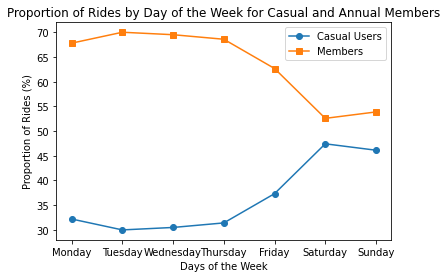

In [22]:
import matplotlib.pyplot as plt

# Define the order of the days of the week (Monday to Sunday)
order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Map day_of_week to a numeric value to help with sorting
day_order_mapping = {day: i for i, day in enumerate(order_of_days)}

# Add a column to represent the order
merged_members_days['day_order'] = merged_members_days['day_of_week'].map(day_order_mapping)

# Sort the DataFrame by the 'day_order' column
merged_members_days_sorted = merged_members_days.sort_values('day_order')

# Separate the data for casual and members
casual_data = merged_members_days_sorted[merged_members_days_sorted['member_casual'] == 'casual']
member_data = merged_members_days_sorted[merged_members_days_sorted['member_casual'] == 'member']

# Plotting the data
plt.plot(casual_data['day_of_week'], casual_data['proportion'], label='Casual Users', marker='o')
plt.plot(member_data['day_of_week'], member_data['proportion'], label='Members', marker='s')

# Adding title and labels
plt.title('Proportion of Rides by Day of the Week for Casual and Annual Members')
plt.xlabel('Days of the Week')
plt.ylabel('Proportion of Rides (%)')

# Adding a legend
plt.legend()

# Show the plot
plt.show()
